In [19]:
import sys
from pathlib import Path

# Add src to path
sys.path.insert(0, str(Path.cwd().parent / 'src'))

import torch
import matplotlib.pyplot as plt
from graphssl.utils.plotting_utils import (
    plot_training_curves,
    plot_downstream_results,
    plot_downstream_distribution,
    plot_all_results,
    print_results_summary,
    plot_confusion_matrix
)

%matplotlib inline

In [20]:
results_base = Path.cwd() / 'results'

# List available result directories
print("Available results directories:")
for i, path in enumerate(sorted(results_base.glob('exp_*')), 1):
    print(f"{i}. {path.name}")

# Select an experiment
results_path = results_base / 'exp_supervised_node_27276446_20251204_195325'
print(f"\nSelected: {results_path.name}")
print(Path.cwd())

Available results directories:
1. exp_ssl_edge_27276469_20251204_125054
2. exp_ssl_node_sce_27272612_20251204_090904
3. exp_ssl_node_sce_27276467_20251205_112553
4. exp_ssl_pfp_27276457_20251205_170628
5. exp_ssl_tar_27276453_20251204_124044
6. exp_ssl_tarpfp_27272713_20251204_095903
7. exp_ssl_tarpfp_27272751_20251204_092313
8. exp_supervised_link_27276449_20251204_123945
9. exp_supervised_node_27276446_20251204_195325

Selected: exp_supervised_node_27276446_20251204_195325
/dtu/blackhole/09/167753/GraphSSL


## 2. Print Results Summary

Get a quick text summary of all results.

In [21]:
print_results_summary(results_path)

Results Summary: exp_supervised_node_27276446_20251204_195325

--- Model Configuration ---
Objective: supervised_node_classification
Hidden channels: 128
Num layers: 2
Epochs: 100

--- Test Metrics (Main Task) ---
Loss: 2.4350
Acc: 0.3744

--- Training History ---
Total epochs: 46
Final train loss: 2.6654
Best val loss: 2.4750
Best val accuracy: 0.3641

--- Downstream Node Classification ---
Test Accuracy: 0.3740 ± 0.0018
Test Loss: 2.4161 ± 0.0030

--- Downstream Link Prediction (Binary) ---
Test Accuracy: 0.8978 ± 0.0015
Test Loss: 0.2502 ± 0.0039


## 3. Plot Training Curves

Visualize the training and validation metrics over epochs.

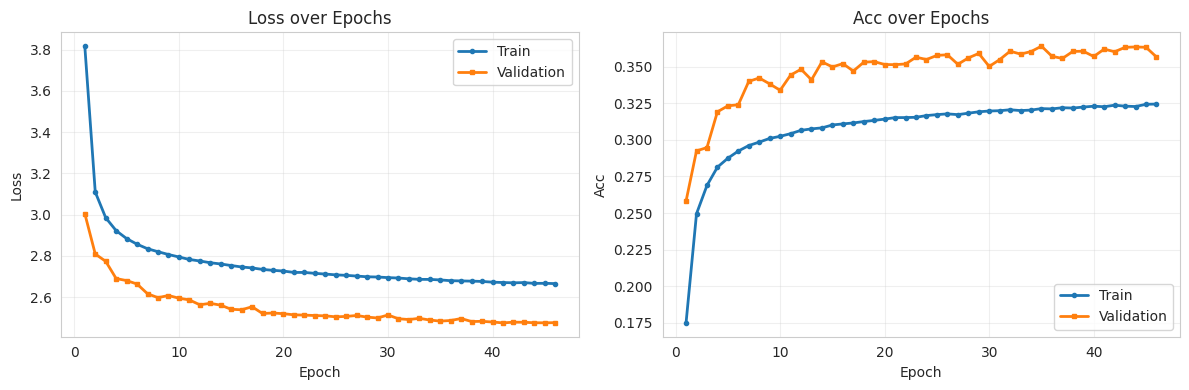

In [22]:
# Plot all available training metrics
fig = plot_training_curves(results_path)

## 4. Plot Downstream Evaluation Results

Visualize downstream task performance with error bars.

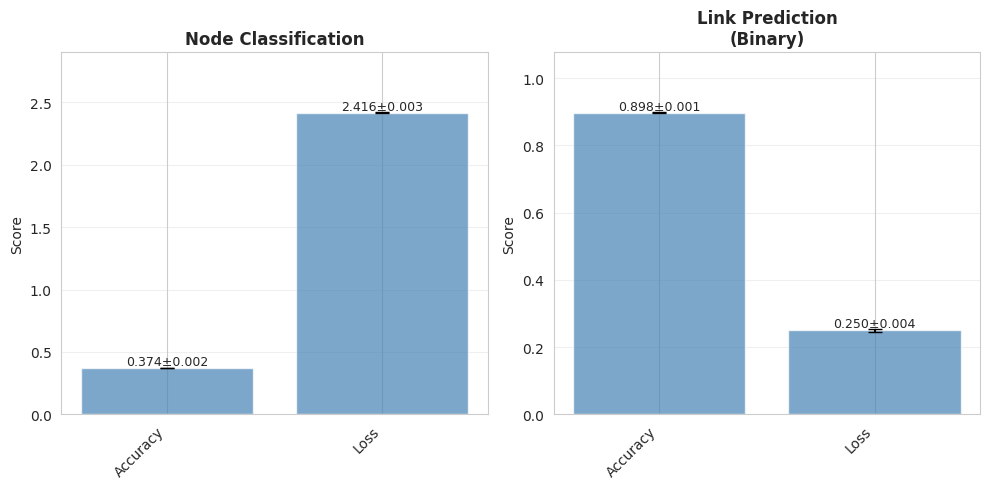

In [23]:
fig = plot_downstream_results(results_path)

## 5. Confusion Matrix for Link Prediction


Confusion Matrix for: downstream_ssl_tar_27302434_20251205_214238



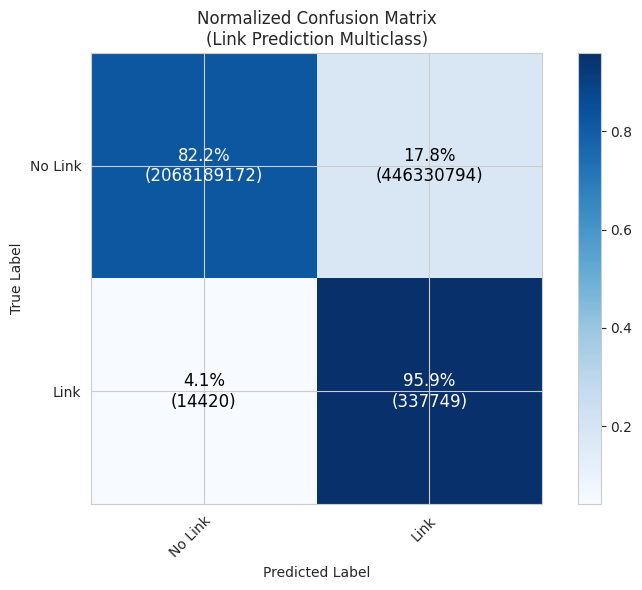

In [24]:
# Plot confusion matrix for a specific experiment with link multiclass results
exp_with_link = results_base / 'downstream_ssl_tar_27302434_20251205_214238'

if exp_with_link.exists():
    results = load_results(exp_with_link)
    if 'downstream_link_multiclass' in results:
        print(f"Confusion Matrix for: {exp_with_link.name}\n")
        fig = plot_confusion_matrix(exp_with_link, normalize=True)
    else:
        print(f"No link multiclass results found in {exp_with_link.name}")
else:
    print(f"Experiment path not found: {exp_with_link.name}")

## Downstream Task Performance Comparison


In [ ]:
import pandas as pd
from graphssl.utils.plotting_utils import load_results

# Define all experiments
all_experiments = [
    'exp_ssl_edge_27276469_20251204_125054',
    'exp_ssl_node_sce_27272612_20251204_090904',
    'exp_ssl_node_sce_27276467_20251205_112553',  # Actually MSE
    'exp_ssl_pfp_27276457_20251205_170628',
    'exp_ssl_tar_27276453_20251204_124044',
    'exp_ssl_tarpfp_27272713_20251204_095903',
    'exp_ssl_tarpfp_27272751_20251204_092313',
    'exp_supervised_link_27276449_20251204_123945',
    'exp_supervised_node_27276446_20251204_195325',
]

# Extract experiment type from name
def get_exp_type(exp_name):
    if 'ssl_edge' in exp_name:
        return 'SSL Edge'
    elif 'ssl_node_sce' in exp_name:
        if '27276467' in exp_name:
            return 'SSL Node MSE'  # The mislabeled one
        return 'SSL Node SCE'
    elif 'ssl_pfp' in exp_name:
        return 'SSL PFP'
    elif 'ssl_tar' in exp_name and 'tarpfp' not in exp_name:
        return 'SSL TAR'
    elif 'ssl_tarpfp' in exp_name:
        return 'SSL TAR+PFP'
    elif 'supervised_link' in exp_name:
        return 'Supervised Link'
    elif 'supervised_node' in exp_name:
        return 'Supervised Node'
    return exp_name

# Collect downstream results
downstream_data = []
for exp_name in all_experiments:
    exp_path = results_base / exp_name
    if exp_path.exists():
        results = load_results(exp_path)
        exp_type = get_exp_type(exp_name)
        
        row = {'Experiment': exp_type}
        
        # Node classification task
        if 'downstream_node' in results:
            node_res = results['downstream_node']
            row['Node Acc (mean)'] = f"{node_res.get('test_acc_mean', 0):.4f}"
            row['Node Acc (std)'] = f"{node_res.get('test_acc_std', 0):.4f}"
        else:
            row['Node Acc (mean)'] = 'N/A'
            row['Node Acc (std)'] = 'N/A'
        
        # Link prediction task
        if 'downstream_link' in results:
            link_res = results['downstream_link']
            row['Link Acc (mean)'] = f"{link_res.get('test_acc_mean', 0):.4f}"
            row['Link Acc (std)'] = f"{link_res.get('test_acc_std', 0):.4f}"
        else:
            row['Link Acc (mean)'] = 'N/A'
            row['Link Acc (std)'] = 'N/A'
        
        # Link multiclass task
        if 'downstream_link_multiclass' in results:
            mclass_res = results['downstream_link_multiclass']
            row['Link MC F1 (mean)'] = f"{mclass_res.get('test_f1_mean', 0):.4f}"
            row['Link MC F1 (std)'] = f"{mclass_res.get('test_f1_std', 0):.4f}"
            row['Link MC Precision (mean)'] = f"{mclass_res.get('test_precision_mean', 0):.4f}"
            row['Link MC Recall (mean)'] = f"{mclass_res.get('test_recall_mean', 0):.4f}"
        else:
            row['Link MC F1 (mean)'] = 'N/A'
            row['Link MC F1 (std)'] = 'N/A'
            row['Link MC Precision (mean)'] = 'N/A'
            row['Link MC Recall (mean)'] = 'N/A'
        
        downstream_data.append(row)

# Create DataFrame
df_downstream = pd.DataFrame(downstream_data)

print("="*100)
print("DOWNSTREAM TASK PERFORMANCE (Test Set)")
print("="*100)
print(df_downstream.to_string(index=False))
print("="*100)